<a href="https://colab.research.google.com/github/sohaibwaheedgithub/Machine-Learning-And-Deep-Learning-Projects/blob/main/Olivetti_Facial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fetching Olivetti Faces data

from sklearn.datasets import fetch_olivetti_faces

X, y = fetch_olivetti_faces(return_X_y = True)

In [ ]:
# Splitting data into train, validation and test set

from sklearn.model_selection import StratifiedShuffleSplit

test_split = StratifiedShuffleSplit(n_splits = 1, test_size = 40, random_state = 42)

train_val_index, test_index = next(test_split.split(X, y))
X_train_val = X[train_val_index]
y_train_val = y[train_val_index]
X_test = X[test_index]
y_test = y[test_index]

val_split = StratifiedShuffleSplit(n_splits = 1, test_size = 80, random_state = 42)

train_index, val_index = next(val_split.split(X_train_val, y_train_val))
X_train = X_train_val[train_index]
y_train = y_train_val[train_index]
X_val = X_train_val[val_index]
y_val = y_train_val[val_index]

In [ ]:
# Performing dimensionality reduction with the preservance of 99 % variance to 
# speed up training

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)

In [ ]:
# Searching for right no of clusters in the image so that we can use clustering
# algorithm with appropriate number of clusters

In [ ]:
from sklearn.cluster import KMeans
kmeans_per_k = []
k = range(5, 150, 5)

for n_clusters in k:
  kmeans_per_k.append(KMeans(n_clusters = n_clusters).fit(X_train_reduced))

Text(0.5, 1.0, 'No of clusters Vs Silhouette Scores')

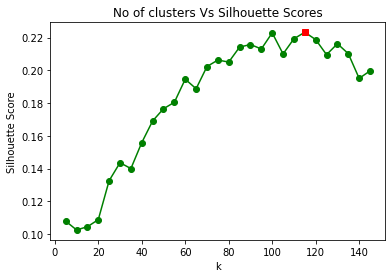

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_reduced, kmeans.labels_) for kmeans in kmeans_per_k]
best_k_index = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_k_index]
best_k = k[best_k_index]
plt.plot(k, silhouette_scores, 'g-o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.plot(best_k, best_score, 'rs')
plt.title('No of clusters Vs Silhouette Scores')

In [ ]:
# Clustering using best no of clusters
kmeans = KMeans(n_clusters = best_k)
kmeans.fit(X_train_reduced)

KMeans(n_clusters=115)

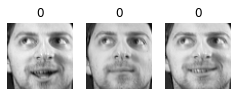

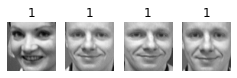

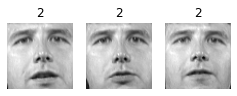

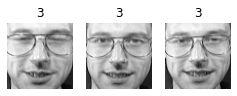

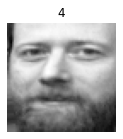

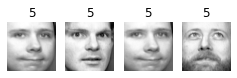

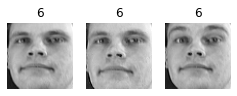

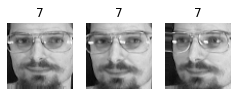

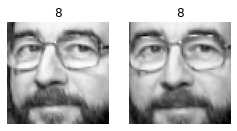

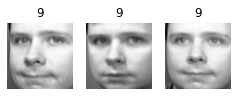

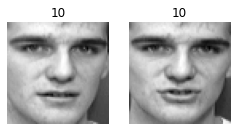

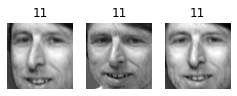

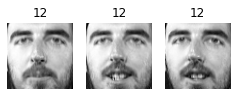

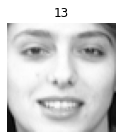

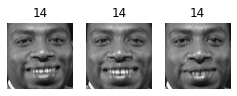

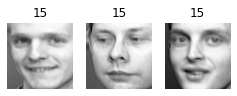

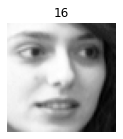

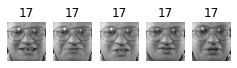

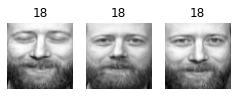

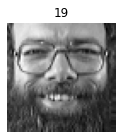

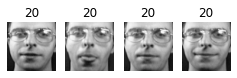

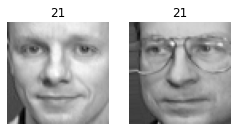

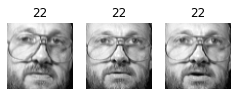

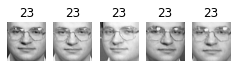

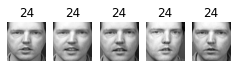

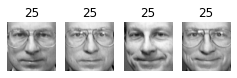

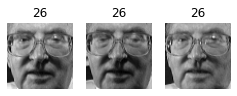

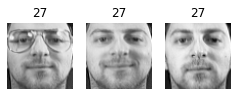

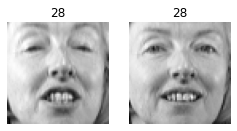

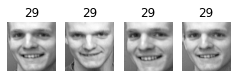

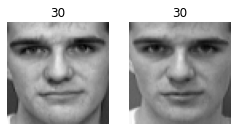

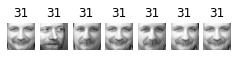

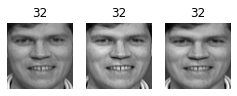

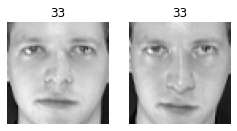

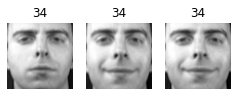

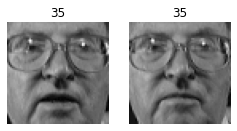

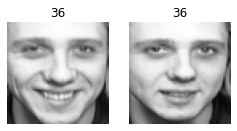

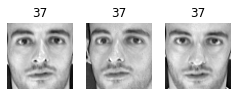

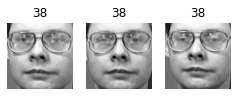

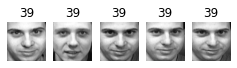

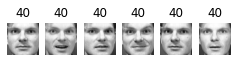

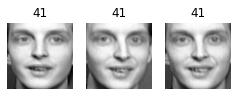

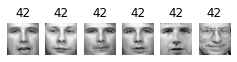

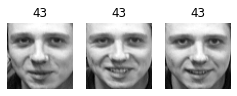

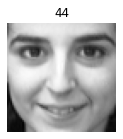

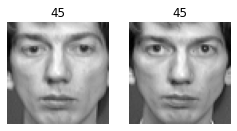

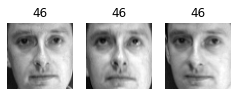

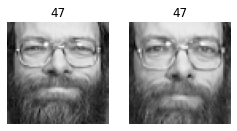

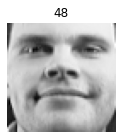

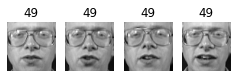

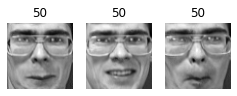

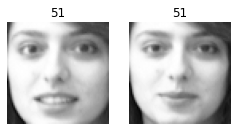

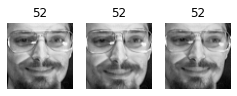

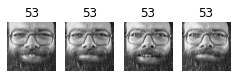

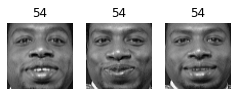

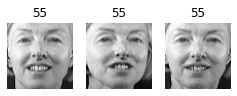

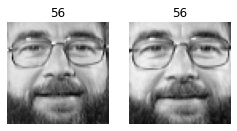

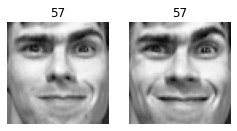

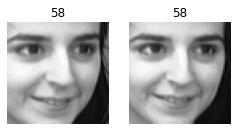

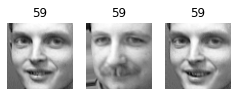

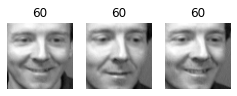

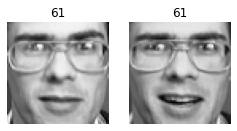

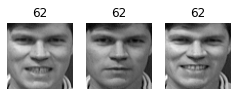

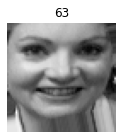

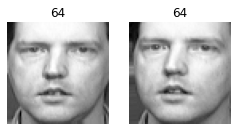

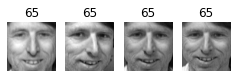

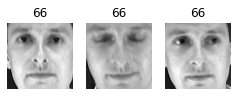

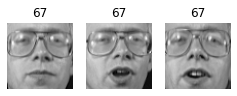

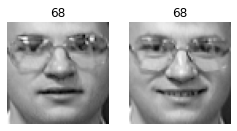

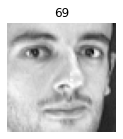

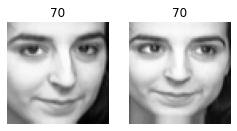

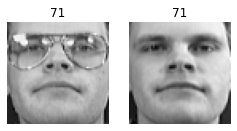

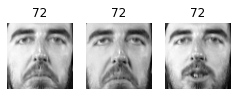

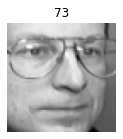

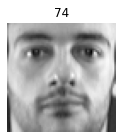

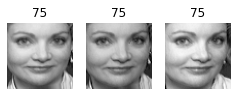

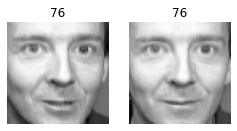

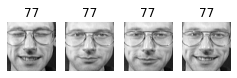

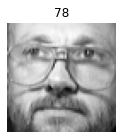

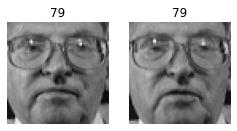

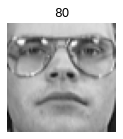

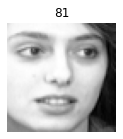

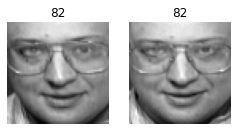

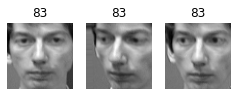

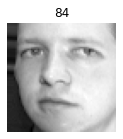

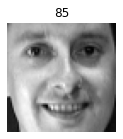

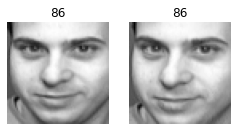

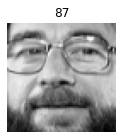

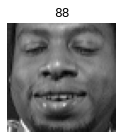

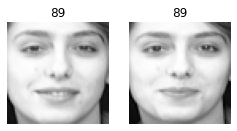

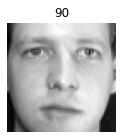

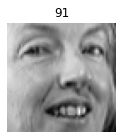

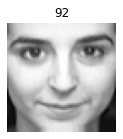

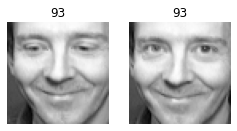

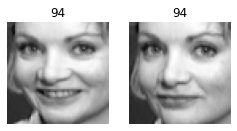

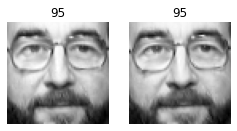

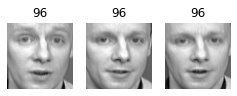

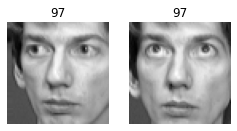

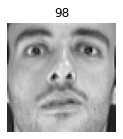

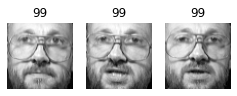

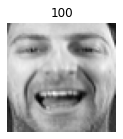

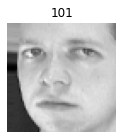

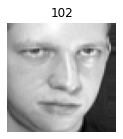

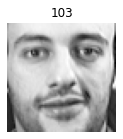

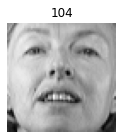

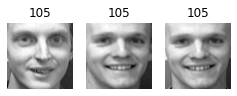

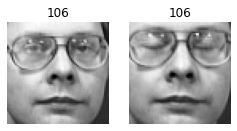

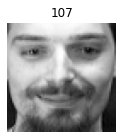

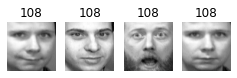

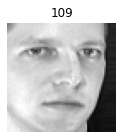

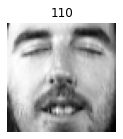

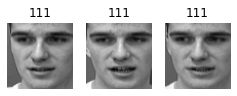

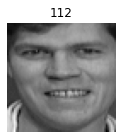

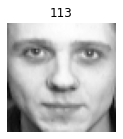

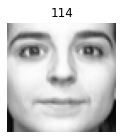

In [ ]:
# Checking to see if the clusters contain similar persons

for i in np.unique(kmeans.labels_):
  inst_indices = (kmeans.labels_ == i)
  X_train_inst = X_train[inst_indices]
  length = X_train_inst.shape[0]
  
  fig = plt.figure(figsize = (4, 2))
  for index in range(1, length+1):
    plt.subplot(1, length, index)
    plt.axis('off')
    face = X_train_inst[[index-1]].reshape(64, 64)
    plt.imshow(face, cmap = 'gray')
    plt.title('{}'.format(i))
  plt.show()